# **Analisis con Pandas y Kaggle**
[Link al DataSet](https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024)

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Electronic_sales.csv")

**Estructura y Flujo del Análisis**





In [139]:
#Sección 1: Exploración de Datos
df.head(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [140]:
df.tail(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34
19999,19998,27,NaN,Yes,Laptop,LTP123,4,Completed,Bank Transfer,674.32,674.32,1,2024-01-29,Expedited,NaN,0.00


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [142]:
df.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000


In [143]:
#Sección 2: Limpieza de Datos

#Eliminar duplicados si los hay, crucial porque los duplicados pueden distorsionar los graficos y el analisis
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f'Hay {df.duplicated().sum()} elementos duplicados')

#valores faltantes
df['Gender'] = df['Gender'].fillna(' ')
df['Add-ons Purchased'] = df['Add-ons Purchased'].fillna(' ')

#Corregir tipos de datos
df['Age'] = df['Age'].astype('int32')
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
col_categorias = ['Gender', 'Loyalty Member', 'Product Type',
                  'Order Status', 'Payment Method', 'Shipping Type', 'Add-ons Purchased']
for i in col_categorias:
  df[i] = df[i].astype('category')

df.info()

Hay 0 elementos duplicados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        20000 non-null  int64         
 1   Age                20000 non-null  int32         
 2   Gender             20000 non-null  category      
 3   Loyalty Member     20000 non-null  category      
 4   Product Type       20000 non-null  category      
 5   SKU                20000 non-null  object        
 6   Rating             20000 non-null  int64         
 7   Order Status       20000 non-null  category      
 8   Payment Method     20000 non-null  category      
 9   Total Price        20000 non-null  float64       
 10  Unit Price         20000 non-null  float64       
 11  Quantity           20000 non-null  int64         
 12  Purchase Date      20000 non-null  datetime64[ns]
 13  Shipping Type      20000 non-null 

**Transformación de Datos**

In [144]:
#LAS NUEVAS TABLAS SERAN DECLARADAS EN INGLES PARA MANTENER LA LOGICA DEL DATASET

#Categoría de Precio (bajo, medio, alto).
low = df['Total Price'].quantile(0.33)
high = df['Total Price'].quantile(0.66)

def categories(precio):
  if precio >= high:
    return "High"
  if precio <= low:
    return "Low"
  else:
    return "Medium"

df['Price Category'] = df['Total Price'].apply(categories)

#Cantidad de Add-ons (Contar cuántos add-ons se compraron)

df['Add-Ons quantity'] = df['Add-ons Purchased'].str.split(',').str.len().fillna(0).astype(int)

#Precio Final (precio total y precio de Add-Ons)

df['Total price with Add-Ons'] = df['Total Price'] + df['Add-on Total']

#Tasa de Satisfacción (Calcular un índice de satisfacción basado en el Rating)

def satisfaction(i):
  if i == 5:
    return 'Very Satisfied'
  elif i == 4:
    return 'Satisfied'
  elif i == 3:
    return 'Neutral'
  elif i == 2:
    return 'Dissatisfied'
  else:
    return 'Very Dissatisfied'

df['Costumer Satisfaction'] = df['Rating'].apply(satisfaction)

#Crear columna 'Month'
df['Month'] = df['Purchase Date'].dt.month

#Clasificar datos en categorías relevantes
#Categoria por edad del cliente (Young, Adult, Senior)

def age_category(age):
  if age <= 24:
    return 'Young'
  elif age >= 60:
    return 'Senior'
  else:
    return 'Adult'

df['Age Category'] = df['Age'].apply(age_category).astype('category')

#Reordenar las tablas
nuevo_orden = ['Customer ID', 'Age', 'Age Category', 'Gender', 'Loyalty Member', 'Product Type', 'SKU',
               'Rating', 'Costumer Satisfaction', 'Order Status', 'Payment Method', 'Total Price',
               'Price Category', 'Unit Price', 'Quantity', 'Add-ons Purchased', 'Add-Ons quantity',
               'Add-on Total', 'Total price with Add-Ons', 'Purchase Date', 'Shipping Type']

df = df[nuevo_orden]

df.head(5)

,Customer ID,Age,Age Category,Gender,Loyalty Member,Product Type,SKU,Rating,Costumer Satisfaction,Order Status,...,Total Price,Price Category,Unit Price,Quantity,Add-ons Purchased,Add-Ons quantity,Add-on Total,Total price with Add-Ons,Purchase Date,Shipping Type
0,1000,53,Adult,Male,No,Smartphone,SKU1004,2,Dissatisfied,Cancelled,...,5538.33,High,791.19,7,"Accessory,Accessory,Accessory",3,40.21,5578.54,2024-03-20,Standard
1,1000,53,Adult,Male,No,Tablet,SKU1002,3,Neutral,Completed,...,741.09,Low,247.03,3,Impulse Item,1,26.09,767.18,2024-04-20,Overnight
2,1002,41,Adult,Male,No,Laptop,SKU1005,3,Neutral,Completed,...,1855.84,Medium,463.96,4,,1,0.00,1855.84,2023-10-17,Express
3,1002,41,Adult,Male,Yes,Smartphone,SKU1004,2,Dissatisfied,Completed,...,3164.76,Medium,791.19,4,"Impulse Item,Impulse Item",2,60.16,3224.92,2024-08-09,Overnight
4,1003,75,Senior,Male,Yes,Smartphone,SKU1001,5,Very Satisfied,Completed,...,41.50,Low,20.75,2,Accessory,1,35.56,77.06,2024-05-21,Express


**Análisis de Datos**

In [145]:
#Promedio de Calificaciones (Calcular el promedio de las calificaciones por tipo de producto)
product_rating = df.groupby('Product Type', observed=False)['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)
print('Rating promedio por producto: \n')
product_rating

Rating promedio por producto: 



,Product Type,Rating
2,Smartphone,3.319003
4,Tablet,3.016326
3,Smartwatch,2.994408
0,Headphones,2.993536
1,Laptop,2.984898


In [146]:
#Ventas por Producto (total de ventas, Promedio de ventas, total de productos vendidos)
sales_by_product = df.groupby('Product Type', observed=False).agg(
    Total_Sales=('Total Price', 'sum'),
    Average_Sales=('Total Price', 'mean'),
    Total_Quantity=('Quantity', 'sum')
).reset_index()

sales_by_product = sales_by_product.sort_values(by='Total_Sales', ascending=False)

print('\nVentas por Producto (Add-ons no incluidos):\n')
sales_by_product


Ventas por Producto (Add-ons no incluidos):



,Product Type,Total_Sales,Average_Sales,Total_Quantity
2,Smartphone,21516754.69,3599.323300,32660
3,Smartwatch,14036273.06,3567.939263,21631
1,Laptop,12296239.97,3094.950911,21584
4,Tablet,11712000.41,2853.801269,22653
0,Headphones,4041400.24,2009.647061,11183


In [147]:
#Análisis Temporal (Ventas por mes, promedio ventas mensuales, variabilidad de las ventas )
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

months = df['Purchase Date'].dt.month

sales_by_months = df.groupby(months).agg(
    Total_Sales=('Total price with Add-Ons', 'sum'),
    Average_Sales=('Total price with Add-Ons', 'mean'),
).reset_index()

sales_by_months['Month_Name'] = sales_by_months['Purchase Date'].map(lambda x: month_names[x - 1])

print('\nTotal Sales by months (Sept2023 - Sept2024): \n')
print(sales_by_months)


Total Sales by months (Sept2023 - Sept2024): 

    Purchase Date  Total_Sales  Average_Sales Month_Name
0               1   6756367.63    3297.397574    January
1               2   5853844.98    3219.936733   February
2               3   6449322.10    3295.514614      March
3               4   6542227.21    3386.245968      April
4               5   6841061.44    3340.362031        May
5               6   6795323.18    3399.361271       June
6               7   6667146.72    3352.009412       July
7               8   6841251.75    3390.114841     August
8               9   5627184.42    3345.531760  September
9              10   2356303.47    2586.502162    October
10             11   2103322.95    2639.050125   November
11             12   2014209.48    2517.761850   December


In [148]:
#Ventas por Género del Cliente (ventas por género, promedio gasto por género)

sales_by_gender = df.groupby('Gender', observed=False).agg(
    Total_Sales = ('Total price with Add-Ons', 'sum'),
    Average_Sales = ('Total price with Add-Ons', 'mean')
).reset_index()

sales_by_gender

,Gender,Total_Sales,Average_Sales
0,,674.32,674.320000
1,Female,32038819.29,3257.632871
2,Male,32808071.72,3227.870102


In [149]:
#Número de Transacciones por Método de Pago (mostrar qué métodos son más populares entre los clientes)

quantity_transactions = df.groupby('Payment Method', observed=False)['Customer ID'].count().reset_index().sort_values(by='Customer ID', ascending= False)
quantity_transactions

,Payment Method,Customer ID
2,Credit Card,5868
0,Bank Transfer,3371
4,PayPal,3284
5,Paypal,2514
1,Cash,2492
3,Debit Card,2471


In [150]:
#Tasa de Cancelación por Producto (agrupar productos y porcentaje de pedidos cancelados)

cancelled = df[df['Order Status'] == 'Cancelled'].groupby('Product Type', observed=False).size()
total_status = df.groupby('Product Type', observed=False).size()

rate = (cancelled / total_status) * 100

rate.reset_index()

,Product Type,0
0,Headphones,32.322228
1,Laptop,32.393657
2,Smartphone,33.021077
3,Smartwatch,32.994408
4,Tablet,33.114035


**Análisis Descriptivo y Visualización**

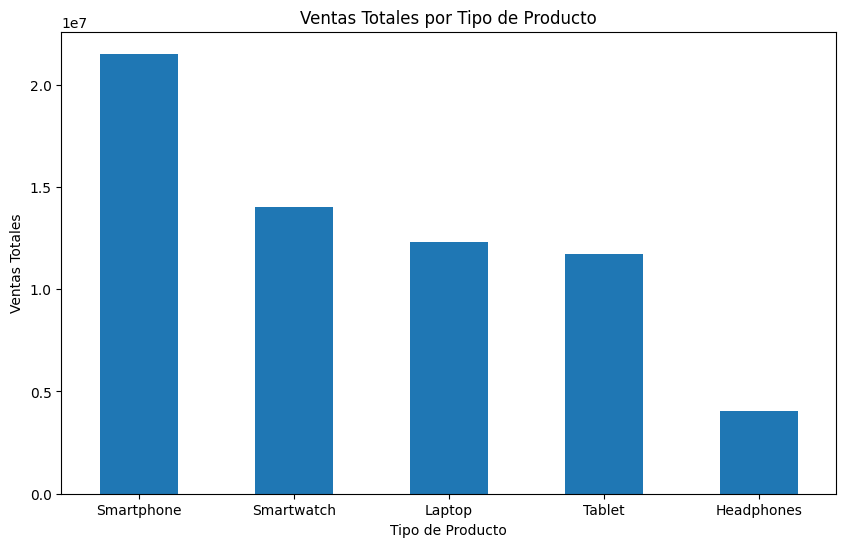

In [151]:
#Gráficos de barras para ventas por categoría de producto
sales_by_product = df.groupby('Product Type', observed=False)['Total Price'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sales_by_product.plot(kind='bar')
plt.title('Ventas Totales por Tipo de Producto')
plt.xlabel('Tipo de Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=0)
plt.show()

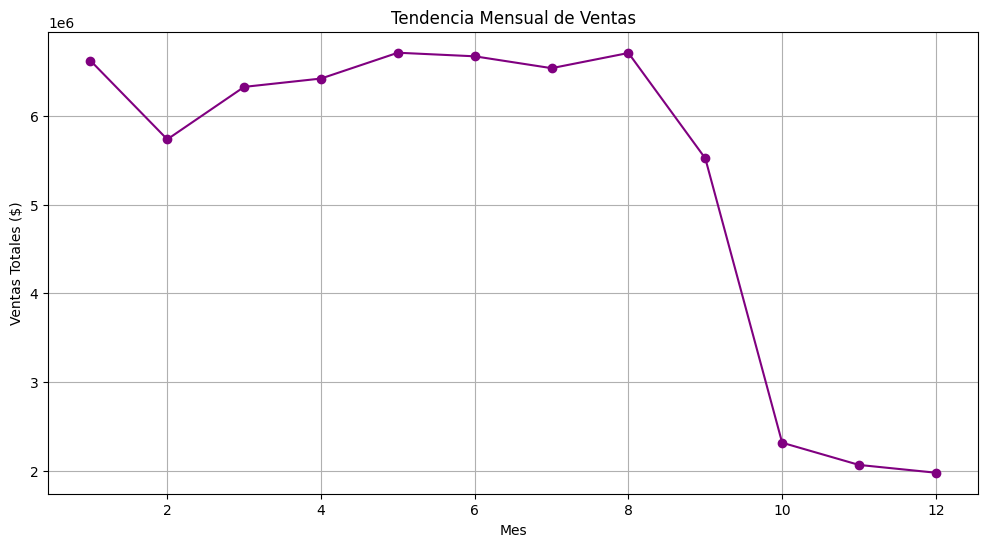

In [153]:
#ventas mensuales
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Month'] = df['Purchase Date'].dt.month
ventas_mensuales = df.groupby('Month')['Total Price'].sum()

plt.figure(figsize=(12, 6))
ventas_mensuales.plot(kind='line', marker='o', color='purple')
plt.title('Tendencia Mensual de Ventas')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales ($)')
plt.grid()
plt.show()

# **Conclusiones:**

**Patrones de Venta por Tipo de Producto:** Las ventas totales muestran que los smartphones y los smartwatches son los productos más vendidos en volumen. Sin embargo, las laptops y tablets suelen tener un precio unitario más alto en promedio.
Los clientes tienen una alta demanda de productos tecnológicos portátiles como smartphones y smartwatches. Esta tendencia puede utilizarse en campañas de marketing para aumentar las ventas en estas categorías.

**Ventas Totales y Preferencias de Producto:** Los productos más vendidos en términos de volumen de ventas son los smartphones y los smartwatches. Sin embargo, en promedio, las laptops y tablets tienden a tener un precio unitario más alto.
La demanda de smartphones y smartwatches es alta, lo cual indica que los clientes prefieren productos tecnológicos portátiles y de uso frecuente. Esta tendencia podría aprovecharse en campañas de marketing para aumentar las ventas en estas categorías.

**Satisfacción del Cliente:** Las calificaciones promedio varían según el tipo de producto. Los smartphones tienen las mejores calificaciones, mientras que las laptops y auriculares tienen calificaciones ligeramente más bajas.
Los clientes están más satisfechos con los smartphones, posiblemente debido a la variedad de opciones y su precio accesible. Es importante mejorar la satisfacción con laptops y auriculares, tal vez mejorando la calidad o ofreciendo promociones adicionales.

**Calificación por Tipo de Producto:** Hay una diferencia en las calificaciones promedio entre los productos. Los smartphones tienen las mejores calificaciones, mientras que los laptops y auriculares tienen una calificación un poco más baja.
El nivel de satisfacción al cliente es mayor para productos como smartphones, lo cual puede estar relacionado con la cantidad de productos disponibles y con un precio bajo. Aun así, debemos trabajar la satisfacción en los casos de laptops y auriculares si se aplican mejoras en la calidad o promociones.

**Análisis Temporal de Ventas:**
**Ventas mensuales:** hay un incremento en las ventas que se lleva a cabo durante los meses de noviembre y diciembre, lo que parece indicar un comportamiento estacional. Las ventas disminuyen considerablemente en enero, lo que indica que el periodo de tiempo posterior a las fiestas es menos activo.
El comportamiento estacional puede ser un buen indicador para lanzar campañas de descuentos o bien se pueden lanzar nuevos productos en los meses de noviembre y diciembre, que puedan hacer frente al incremento de la demanda, durante enero se pueden aplicar promociones para vaciar el stock de productos.

**Métodos de pago preferidos por los usuarios:**
**Distribución por método de pago:** la tarjeta de crédito es el método más utilizado, seguido por los usuarios de transferencias bancarias y PayPal.
La preferencia por pagar con tarjeta de crédito puede indicar que los clientes dan mucha importancia a la facilidad y la seguridad de éste medio, lo que puede ayudar a mejorar la toma de decisiones en referencia a las futuras campañas de financiación o bien en ofertas exclusivas para pagos con tarjeta.

**Tasa de cancelación por producto:**
**Cancelaciones por tipo de producto:** la tasa de cancelación es bastante uniforme entre productos, con una tasa de alrededor del 32-33% de promedio. Aun así, auriculares y laptops parecen tener una tendencia a presentar más cancelaciones.
La tasa de cancelación puede ser un buen indicador de la satisfacción del cliente o bien de problemas de expectativa en ciertos productos. Sería interesante explorar el porqué de estas cancelaciones, y más en el caso de auriculares y laptops a la vez que se exploran mejoras en la información que se ofrece de los productos u opciones de las devoluciones.


# **Recomendaciones:**
**Campañas Dirigidas por Producto:** centrarse en campañas para productos de alta demanda como smartphones y smartwatches, y pensar en promociones especiales para laptops y auriculares para mejorar la satisfacción y reducir cancelaciones.

**Promociones Temporales:** usar los meses de noviembre y diciembre para lanzar promociones estacionales y reducir inventario en enero con descuentos.

**Políticas de Pago y Financiamiento:** ofrecer beneficios extra para compras con tarjeta de crédito, ya que es el método favorito de la mayoría de los clientes, y considerar opciones de financiamiento para productos de mayor valor unitario.

**Mejoras en la Calidad del Producto:** Revisar y mejorar la calidad o descripciones de auriculares y laptops, para reducir las tasas de cancelación y aumentar la satisfacción del cliente.